# Assignment 7
### Do any five.

## Completed by William Brannock (svv8fs)

### Completed Problems 1,2,6,10,11


## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

### Part A
What is the expected value of a single die roll? 

$\mathbb{E}[X]= 1 * \dfrac{1}{6} + 2 * \dfrac{1}{6} + 3 * \dfrac{1}{6} + 4 * \dfrac{1}{6} + 5 * \dfrac{1}{6} + 6 * \dfrac{1}{6}$ 

$\mathbb{E}[X]= \dfrac{21}{6} = 3.5$ 


### Part B
$\mathbb{E}[X]= 2 * \dfrac{1}{36} + 3 * \dfrac{2}{36} + 4 * \dfrac{3}{36} + 5 * \dfrac{4}{36} + 6 * \dfrac{5}{36} + 7 * \dfrac{6}{36} + 8 * \dfrac{5}{36} + 9 * \dfrac{4}{36} + 10 * \dfrac{3}{36} + 11 * \dfrac{2}{36} + 12 * \dfrac{1}{36}$ 

$\mathbb{E}[X]= \dfrac{252}{36} = 7$ 


### Part C
You must pay at least 1 dollar to place a bet.

Probability of Winning Bet for K slots: $ \dfrac{K}{37} $

Return for Winning: $ \dfrac{36}{K} $

Probablity of Losing: $ \dfrac{37-K}{37} $

Return for Losing: 0

So doing some algebra,

$\mathbb{E}[X]= \dfrac{K}{37} * \dfrac{36}{K} +  \dfrac{37-K}{37} * 0 - 1$ 

$\mathbb{E}[X]= \dfrac{K}{37} * \dfrac{36}{K}  - 1$ 

$\mathbb{E}[X]= \dfrac{36}{37} - 1 \approx -0.027027$ 




### Part D
$\mathbb{E}[X]= 1 * \dfrac{1}{6} + 2 * \dfrac{1}{6} + 3 * \dfrac{1}{6} + 4 * \dfrac{1}{6} + 5 * \dfrac{1}{6} + \dfrac{1}{6} * (6 + 1 * \dfrac{1}{6} + 2 * \dfrac{1}{6} + 3 * \dfrac{1}{6} + 4 * \dfrac{1}{6} + 5 * \dfrac{1}{6} + 6 * \dfrac{1}{6})$ 


$\mathbb{E}[X]= \dfrac{15}{6} + \dfrac{1}{6} * (6 + \dfrac{21}{6})$ 

$\mathbb{E}[X]= \dfrac{15}{6} + \dfrac{6}{6} + \dfrac{21}{36} $ 

$\mathbb{E}[X]= \dfrac{90}{36} + \dfrac{36}{36} + \dfrac{21}{36} = \dfrac{147}{36} \approx 4.0833$ 

### Part E



Mean of simulated values: 4.20507


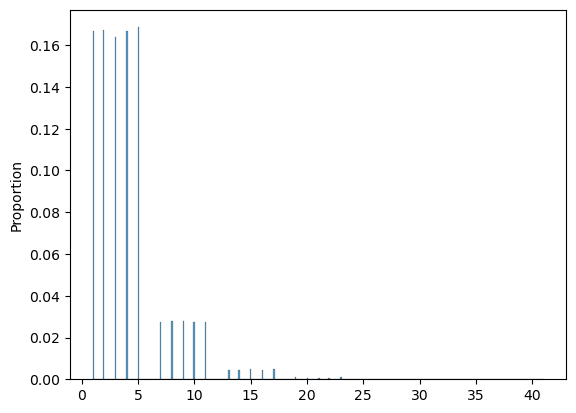

In [17]:
import numpy as np
import seaborn as sns

# set seed
np.random.seed(42)

# sim die roll until you don't get a 6

def roll_until_not_six():
    total_sum = 0
    rolled_six = False

    while not rolled_six:
        roll = np.random.randint(1, 7)
        total_sum += roll
        if roll != 6:
            rolled_six = True
    return total_sum

# simulate n attempts of the die rolling process
def simulate_n_attempts(n):
    results = []
    for i in range(n):
        result = roll_until_not_six()
        results.append(result)
    return results

# simulate 10,0000 attempts
simulation_results = simulate_n_attempts(100000)

# plot the results
sns.histplot(simulation_results, stat = 'proportion')

print(f"Mean of simulated values: {np.mean(simulation_results)}")

So the average output of the 100,000 simulations came about to be about 4.2.

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

### Part A: Compute the expected value for a uniform random variable
For a continuous random variable we know that $\mathbb{E}[x] = \int_{-\infty}^{+\infty} xf(x)dx$

So for a uniform random variable between 0 and 1

$\mathbb{E}[X] = \int_{0}^{1} x(1)dx =\int_{0}^{1} xdx $

Using Power Rule and evalutating,

$\mathbb{E}[X] = \left[ \frac{x^2}{2}\right]_{0}^{1} = \frac{1}{2} - 0 = \frac{1}{2} $


### Part B: Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$

Again we start with the definition $\mathbb{E}[x] = \int_{-\infty}^{+\infty} xf(x)dx$

$\mathbb{E}[a +bX] = \int_{-\infty}^{+\infty} (a + bx)f(x)dx$

Distributing f(x) we get,

$\mathbb{E}[a +bX] = \int_{-\infty}^{+\infty} af(x) + bxf(x) dx$

We can break this apart into,

$\mathbb{E}[a +bX] = a\int_{-\infty}^{+\infty} f(x) + b\int_{-\infty}^{+\infty} xf(x) dx$

We know that $\int_{-\infty}^{+\infty} f(x)$ must be 1 so, 

$\mathbb{E}[a +bX] = a + b\int_{-\infty}^{+\infty} xf(x) dx$

Finally, we again use the definition $\mathbb{E}[x] = \int_{-\infty}^{+\infty} xf(x)dx$

$\mathbb{E}[a +bX] = a + b\mathbb{E}[x]$


### Part c: Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

Let's take $v(y)= y^2$ for a Uniform Random Variable Between 0 and 1

From Problem 2 we have, 

$\mathbb{E}[X] = \frac{1}{2} $ for a Uniform RV betwen 0 and 1

So,

$v(\mathbb{E}[X]) = \frac{1}{2}^2 = \frac{1}{4}$

$\mathbb{E}[v(X)]= \int_{0}^{1} x^2dx =\left[ \frac{x^3}{3}\right]_{0}^{1} = \frac{1}{3}$

So we show that for $v(y) = y^2$ 

$v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$



## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

## 5. 

Suppose $X$ has an expectation $\mathbb{E}[X]<\infty$ and variance $\mathbb{V}[X]<\infty$; this isn't always true, but is *usually* true
- Consider making a new variable, $\varepsilon = X - \mathbb{E}[X]$
- What's the expectation of $\varepsilon$?
- What's the variance of $\varepsilon$?
- So we can write any random variable in the form $X = \mathbb{E}[X] + \varepsilon, $ where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon] = \sigma_X^2$
- If that's true, show that we can also write any random variable in the form $X = \mathbb{E}[X] + \sigma_X \varepsilon$, where $\mathbb{E}[\varepsilon]=0$ and $\mathbb{V}[\varepsilon]=1$
- Now replace $\mathbb{E}[X]$ with $x\beta$, and the stage is set for regression models

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

Plugging in Taylor Series Expansions from above,

$ \mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3) - (F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3))}{2h}$

Distributing the minus,

$ \mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3) - F(x) + h f(x) - \frac{h^2}{2} f'(x)- O(h^3)}{2h}$

Canceling things out,

$ \mathbb{E}[\hat{f}_{X,h}(x)] = \frac{hf(x)  + O(h^3)  + h f(x) - O(h^3)}{2h} = \frac{2hf(x)  + O(h^3)  - O(h^3)}{2h}$

Rearranging things,

$ \mathbb{E}[\hat{f}_{X,h}(x)] = f(x) + \frac{O(h^3)  - O(h^3)}{2h}$

Because we don't know the constatns inside with Big O, $O(h^3)  - O(h^3) = O(h^3)$

$ \mathbb{E}[\hat{f}_{X,h}(x)] = f(x) + \frac{O(h^3)}{2h}$

Simplyfing again because we don't care about the constants with Big O we get our final result,

$ \mathbb{E}[\hat{f}_{X,h}(x)] = f(x) + O(h^2)$



## 7.
- Suppose $X$ and $Y$ are distributed bivariate normal. Show that if $\rho=0$, then $X$ and $Y$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix, then $X_1, X_2, ..., X_n$ are independent.
- For the multivariate normal, show that if $\Sigma$ is a diagonal matrix and all the $\sigma_i^2$ and all the $\mu_i$ are equal, then $X_1, X_2, ..., X_n$ are independently distributed random variables with distribution $N(\mu, \sigma^2)$

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

## 9.
- Open the Ames house price data. Make a KDE of 'price'. Select an appropriate distribution for modeling it, and explain why you selected it. (Hint: You might want to take a common transformation of price.)
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood. What is the MLE?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameters.

## 10.
- Open the METABRIC data. Make a KDE of 'Overall Survival (Months)'.
- Let survival time, $T$ be distributed exponentially with parameter $\lambda$. Then its distribution is
$$
F(t) = 1 - e^{-\lambda t} = p[T\le t].
$$
- Derive the density for this distribution.
- Write out the likelihood.
- Maximize the likelihood with respect to $\lambda$. What is the MLE, $\hat{\lambda}$?
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of $\hat{\lambda}$.

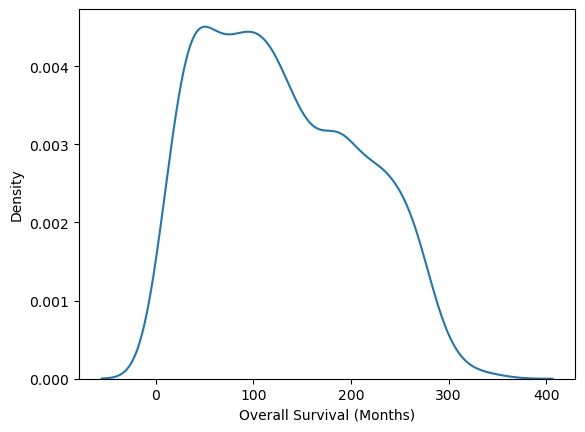

In [19]:
# Part A, Making KDE of Overall Survival in Months
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


metabric = pd.read_csv('./data/metabric.csv')
sns.kdeplot(metabric['Overall Survival (Months)'])
plt.show()

Taking derivative to get density function,

$f(t) = \lambda e^{-\lambda t}$

Writing out the likelihood,

$L(\lambda)= \prod_{i=1}^n \lambda e^{-\lambda x_i}= \lambda^n e^{-\lambda \sum_{i=1}^n x_i}$

Taking the log likelihood to make it easier to maximize,

$\ell(\lambda) = n \log \lambda - \lambda \sum_{i=1}^n x_i$

Take the derivative with respect to $\lambda$

$\ell'(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^n x_i$

Now set to 0 and solve,

$\frac{n}{\hat{\lambda}} - \sum_{i=1}^n x_i = 0$

Adding $\sum_{i=1}^n x_i $ to both sides,


$\frac{n}{\hat{\lambda}}  = \sum_{i=1}^n x_i$

And finally we can isolate $\hat{\lambda}$ to get the MLE

$\hat{\lambda}  = \frac{n}{\sum_{i=1}^n x_i}$ (This is just the sample average)



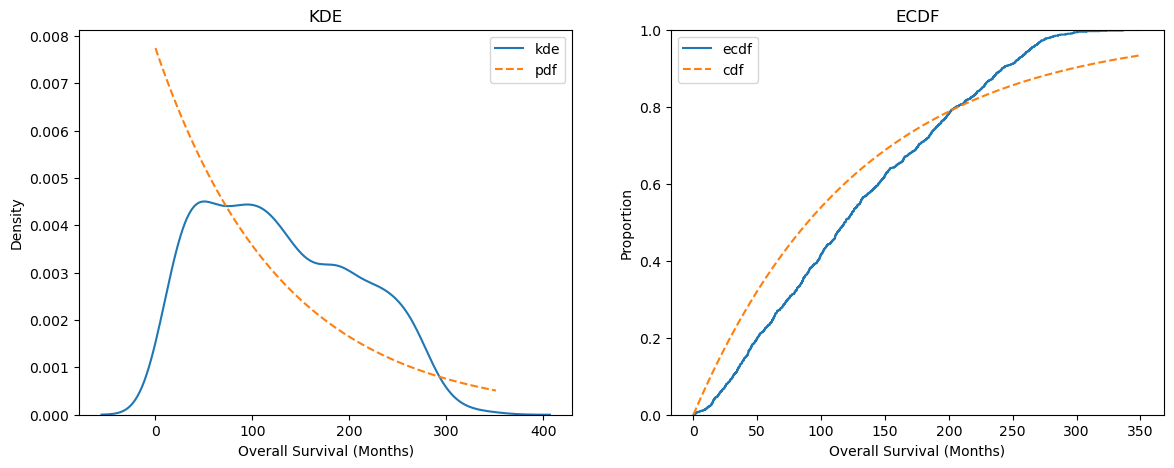

Estimated lambda: 0.007746275913926935


In [51]:
# Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
import scipy.stats as stats
y = metabric['Overall Survival (Months)']

lambda_hat = 1 / metabric['Overall Survival (Months)'].mean()

# scipy's scale parameter is 1/lambda, which is just the mean
scale = metabric['Overall Survival (Months)'].mean()

grid = np.linspace(0, metabric['Overall Survival (Months)'].max(), 100)

pdf = stats.expon.pdf(grid, scale=scale)
cdf = stats.expon.cdf(grid, scale=scale)

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=y,ax=axes[0],label='kde')
sns.lineplot(x=grid,y=pdf,ax=axes[0],label='pdf',linestyle='--')
axes[0].set_title('KDE')
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

#Print estimated lambda for checking
print(f"Estimated lambda: {lambda_hat}")

The fit isn't that great here in my opinion. I would argue that this model could be underfitting, specifically when you look at the lower end of the KDE plot. However, it might still be ok as a rough approximiation.



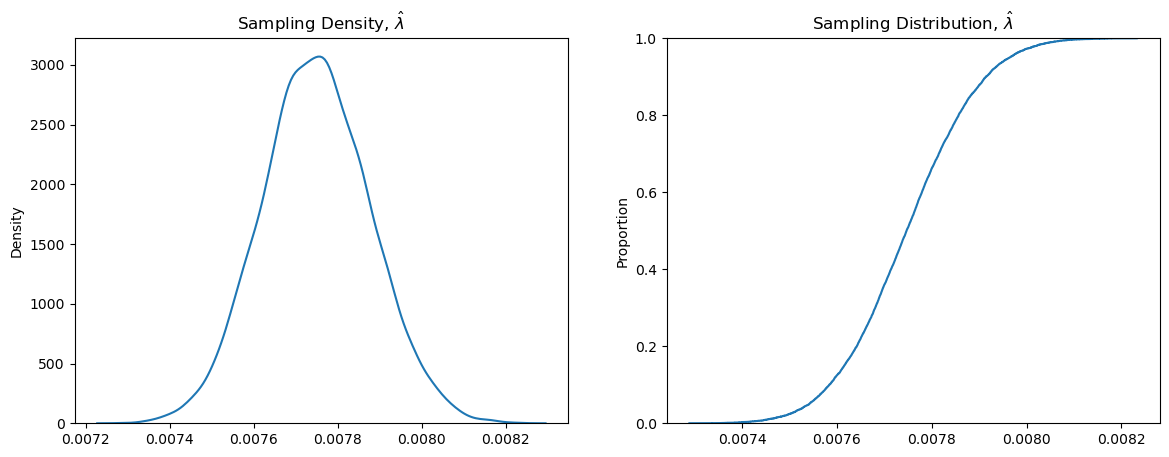

In [ ]:
# Bootstrap the sampling density/distribution of lambda hat

def max_likelihood_expon(sample):
    return 1 / np.mean(sample)

n = 10000

#sampling with replacement
sample = [max_likelihood_expon(np.random.choice(metabric['Overall Survival (Months)'], size=len(metabric), replace=True)) for _ in range(n)]

lambda_hat_sample = [ row for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=lambda_hat_sample ,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\lambda}$')
sns.ecdfplot(x=lambda_hat_sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\lambda}$')
plt.show()



## 11.
- Open the Ames house price data. Make a histogram of 'TotRms.AbvGrd', or total rooms above ground.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.

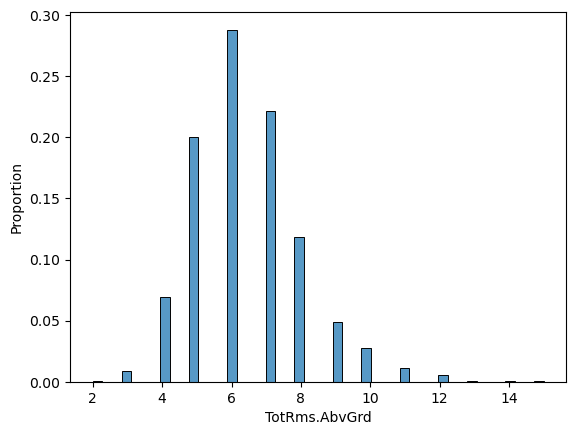

In [28]:
# Making histogram of 'TotalRms.Abv.Grd'
ames = pd.read_csv('./data/ames_prices.csv')
y = ames['TotRms.AbvGrd']
sns.histplot(y, stat='proportion')
plt.show()

Writing out the likelihood,

$L(\lambda)= \prod_{i=1}^n \frac{ \lambda^k e^{-\lambda} }{{y_i!}}$

Taking logs to make it easier to deal with,

$\ell(\lambda) = \sum_{i=1}^n \left( y_i \log \lambda - \lambda - \log(y_i!) \right)$

Rearranging we get,

$\ell(\lambda) = \left(\sum_{i=1}^n y_i\right)\log \lambda - n\lambda + C$

Take the derivative with respect to $\lambda$

$\ell'(\lambda) = \frac{\sum y_i}{\lambda} - n$


Setting equal to 0 and solving for $\hat{\lambda}$ to get the MLE

$\hat{\lambda} = \frac{1}{n} \sum_{i=1}^n y_i $

As hinted, this is once again the sample mean.


I think we need to make histogram here rather than a kde as the Poisson is discrete 

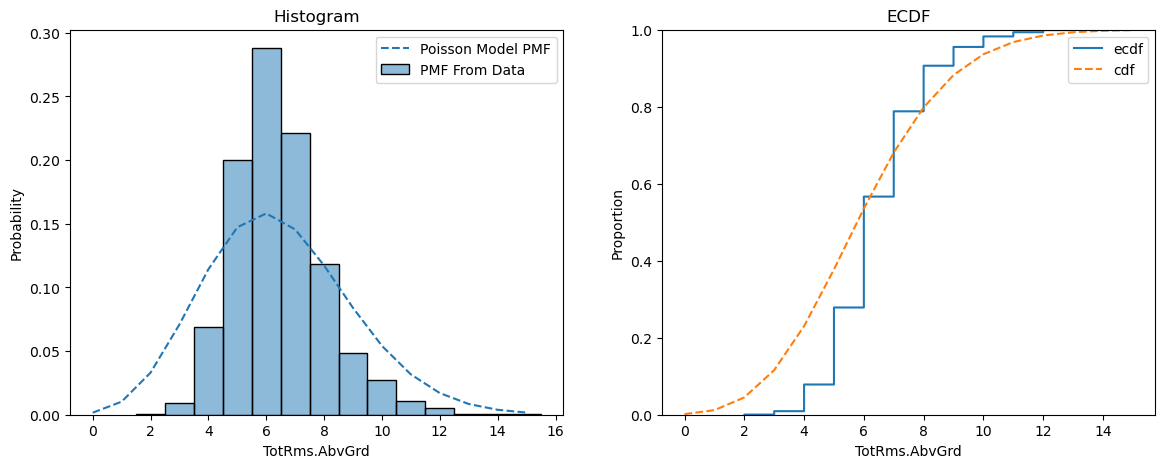

Estimated lambda for Poisson model: 6.443003412969284


In [54]:
# Part C, Plotting histogram and ECDF against Poisson model
y = ames['TotRms.AbvGrd']

# As I showed above, the MLE is just the sample mean
lambda_hat = ames['TotRms.AbvGrd'].mean()

# create grid
grid = np.arange(0, ames['TotRms.AbvGrd'].max() + 1)

pmf = stats.poisson.pmf(grid, mu=lambda_hat)

#I think this should technically be a cmf but the function works anyway 
cdf = stats.poisson.cdf(grid, mu=lambda_hat)

fig, axes = plt.subplots(1,2,figsize=(14,5))
# Use histogram for discrete data, not KDE
sns.histplot(x=y, stat='probability', discrete=True, ax=axes[0], label='PMF From Data', alpha=0.5)
axes[0].plot(grid, pmf, label='Poisson Model PMF', linestyle='--')
axes[0].set_title('Histogram')
axes[0].legend()
sns.ecdfplot(x=y,ax=axes[1],label='ecdf')
sns.lineplot(x=grid,y=cdf,ax=axes[1],label='cdf',linestyle='--')
axes[1].set_title('ECDF')
plt.show()

# print out estimated lambda
print(f'Estimated lambda for Poisson model: {lambda_hat}')

Looking at the KDE the Poisson model seems to be not capturing the spike in the middle and overweighted in the tails when compared to reality.

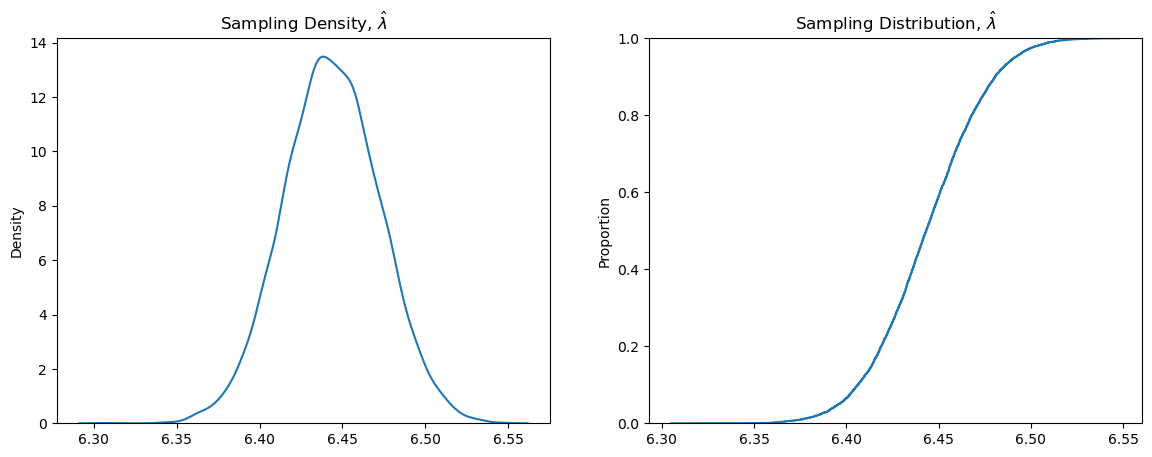

In [55]:
# Bootstrap the sampling density/distribution of lambda hat

def max_likelihood_poisson(sample):
    return np.mean(sample)

n = 10000

#sampling with replacement
sample = [max_likelihood_poisson(np.random.choice(ames['TotRms.AbvGrd'], size=len(ames), replace=True)) for _ in range(n)]

lambda_hat_sample = [ row for row in sample]
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=lambda_hat_sample ,ax=axes[0],label='kde')
axes[0].set_title('Sampling Density, $\\hat{\\lambda}$')
sns.ecdfplot(x=lambda_hat_sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sampling Distribution, $\\hat{\\lambda}$')
plt.show()



It again looks normal like the last graph. I believe this is because of the Central Limit Theorem. 

## 12.
- Open the METABRIC data. Make a histogram of 'Mutation Count' with around 50 bins. Let $Y$ be the mutation count the random variable, and $y_i$ the mutation count for patient $i$.
- We're going to model this using the Poisson Distribution. The probability that $y_i = k$ is given by
$$
pr[y_i = k ] = \frac{ \lambda^k e^{-\lambda} }{k!}
$$
- Write out the likelihood.
- Maximize the likelihood. What is the MLE? (Hint: The sample mean. As usual.)
- Plot the density/distribution for your fitted model and compare it to the KDE/ECDF. Criticize the fit.
- Bootstrap the sampling density/distribution of your parameter.